<a href="https://colab.research.google.com/github/sujithgunturu/Math799/blob/master/symbolicsolve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from sympy import *
init_printing(use_unicode=True)

In [17]:
S_xl, theta_vr,theta_vd, theta_vo, theta_vs, theta_vq, theta_ps, theta_a, theta_pr, \
theta_pm, theta_tr, theta_td, theta_t0, theta_alpha, theta_el, theta_k, theta_sr,\
theta_sm, theta_rue, theta_m, theta_gx, theta_gb, theta_ts, k_i, k_m, k_e,t\
= symbols('S_xl theta_vr theta_vd theta_vo theta_vs theta_vq theta_ps \
theta_a theta_pr theta_pm theta_tr, theta_td, theta_t0, theta_alpha, theta_el, theta_k\
 theta_sr theta_sm theta_rue theta_m theta_gx theta_gb theta_ts k_i k_m k_e t')

In [18]:
S_vt = Function('S_vt')
S_lt = Function('S_lt')
S_at = Function('S_at')
S_wt = Function('S_at')
S_bt = Function('S_bt')
S_yt = Function('S_yt')
S_gt = Function('S_gt')

In [19]:
from scipy.interpolate import interp1d
import numpy as np
from sympy import *
# DataPointsDomain = np.linspace(0, 10, 3, endpoint=True)
# DataPointsRange =  np.cos(-DataPointsDomain**2/9.0)
# average_daily_temperature = interpolating_spline(2, t, DataPointsDomain, DataPointsRange)
# average_daily_temperature

In [20]:
t = Symbol('t')
W_at = t**2
W_pt = t**2

W_st = t**2
W_nt = t**2
W_ht = t**2

W_pt2 = t**2
W_st = t**2
W_wt = t**2

W_rt = t**2
W_xt = t**2

import numpy as np
from scipy import interpolate
import pandas as pd
df = pd.read_csv('/content/Weather_data_2020.csv')
x = np.linspace(0,4, 4, endpoint=True)


# DataPointsRange =  np.cos(-DataPointsDomain**2/9.0)
# average_daily_temperature = interpolating_spline(2, t, DataPointsDomain, DataPointsRange)
# RELHUM2MAVG

# y = df["RELHUM2MAVG"][:4]
# W_ht = interpolating_spline(2, t, x, y)
# #W_ht = interpolate.interp1d(x, y, fill_value="extrapolate")


# #WSPD2MAVG
# y = df["WSPD2MAVG"][:4]
# W_wt = interpolating_spline(2, t, x, y)
# #W_wt = interpolate.interp1d(x, y, fill_value="extrapolate")


# #PRECIP
# y = df["PRECIP"][10:14]
# W_rt = interpolating_spline(2, t, x, y)
# #W_rt = interpolate.interp1d(x, y, fill_value="extrapolate")


# # (TEMP2MAVG)
# y = df["TEMP2MAVG"][:4]
# W_at = interpolating_spline(2, t, x, y)
# #W_at = interpolate.interp1d(x, y, fill_value="extrapolate")


# #SR
# y = df["SR"][:4]
# W_st = interpolating_spline(2, t, x, y)
# #W_st = interpolate.interp1d(x, y, fill_value="extrapolate")


# #PRESSUREAVG
# y = df["PHOTOPERIOD"][:4]
# W_pt = interpolating_spline(2, t, x, y)
# #W_pt = interpolate.interp1d(x, y, fill_value="extrapolate")

# #PHOTOPERIOD
# y = df["PRESSUREAVG"][:4]
# W_pt2 = interpolating_spline(2, t, x, y)
# #W_pt2 = interpolate.interp1d(x, y, fill_value="extrapolate")

# #TEMP2MMIN
# y = df["TEMP2MMIN"][:4]
# W_nt = interpolating_spline(2, t, x, y)
# #W_nt = interpolate.interp1d(x, y, fill_value="extrapolate")


# #TEMP2MMAX
# y = df["TEMP2MMAX"][:4]
# W_xt = interpolating_spline(2, t, x, y)
# #W_xt = interpolate.interp1d(x, y, fill_value="extrapolate")


In [21]:
theta_vr = -0.28
theta_vd = 5
theta_vo = 4
theta_vs = 1
theta_vq = 42
theta_ps = 0.8
theta_pr = 0.44
theta_pm = 10.67
theta_tr = 0.14
theta_td = -7.6
theta_t0 = 24
theta_alpha = 0.30
theta_el = 18
theta_k = 0.75
theta_sr = 10
theta_sm =35
theta_gx = 45
theta_m = 60
theta_gb = 20
theta_ts = 15
theta_rue = 1.15
theta_a = 36
S_xl = 150
# wrong, added for time being
k_i = 0.45
k_m = 1.3
k_e = 0.2

1

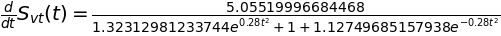

In [22]:
dSvt_dt = S_vt(t).diff(t)
CV = Eq(dSvt_dt, (1 + exp(-1 * theta_vr * theta_vd))/(1+ (exp((-1 * theta_vr * (W_at - theta_vo + theta_vd)))) + ((exp( (theta_vr) * (W_at - theta_vo)  - 1)))))
CV

2

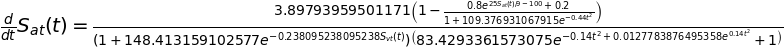

In [23]:
f_vt = 1-theta_vs*(1- 1/(1+exp(-10/theta_vq*(S_vt(t) - theta_vq/2))))
f_pt = 1 - (1 - theta_ps * (1- (1 / (exp(-100 * (( S_at(t)/theta_a)-1) ))) )) * (1/(1 + exp(-theta_pr*(W_pt - theta_pm))))
d_tt = (1 + exp(-1 * theta_tr * theta_td)) / (1 + exp(-1 * theta_tr *(W_at - theta_t0 + theta_td) + exp((theta_tr * (W_at - theta_t0)) -1)))
dSat_dt = S_at(t).diff(t)
PA = Eq(dSat_dt,f_vt * f_pt * d_tt)
PA

3

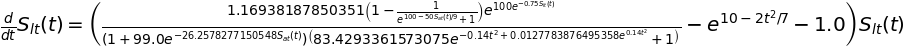

In [24]:
f_wt = 1 / (1 + exp((-np.log (99)/0.175)*(S_wt(t) - 0.175)))
dSlt_dt = S_lt(t).diff(t)
LAI = Eq(dSlt_dt, S_lt(t) * (d_tt*theta_alpha*f_wt*(1 - (1/(1+exp(-1* 100 * ((S_at(t)/theta_el) -1)))))* (1/exp(-1 * 100 *(exp(-1 * theta_k * S_lt(t))))) - (1/1+exp(-1 * theta_sr * (W_at/theta_sm - 1) ))))
LAI

4

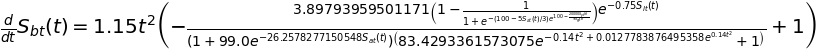

In [25]:
dSbt_dt = S_bt(t).diff(t)
BIO = Eq(dSbt_dt, theta_rue * W_st * (1- exp(-1*theta_k * S_lt(t)) * f_wt* d_tt * (1- (1/ (1+exp(-100 * (S_at(t)/theta_m -1)*(1-(1/1+exp(-100*((1000 * S_yt(t)) /(theta_gx *S_gt(t)) -1)))) )) ) )))
BIO

5

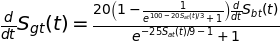

In [26]:
dSgt_dt = S_gt(t).diff(t)
GN = Eq(dSgt_dt, dSbt_dt * theta_gb * (1 / (1 + exp(-1 * 100 * (S_at(t)/theta_a)-1))) * (1 - (1/(1+exp(-1 * 100 * (S_at(t)/theta_ts -1))))))
GN

6

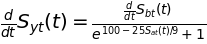

In [27]:

dSyt_dt = S_yt(t).diff(t)
Y = Eq(dSyt_dt, dSbt_dt * (1/ (1+exp(-1 * 100* (S_at(t)/theta_a -1)))))
Y

7

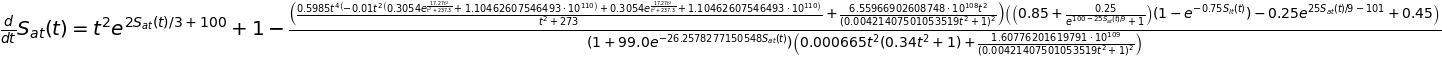

In [28]:
D_t = (4098 * 0.6108 * exp((17.27 * W_at)/W_at+237.3))/(W_at + 237.3)**2
e_st = 0.6108 * (exp((17.27 * W_xt)/(W_xt + 237.3)) + exp((17.27 * W_nt)/W_nt +237.3)) /2 
e_at = e_st * W_ht * 0.01
gamma_t = 0.665 * 10**-3 * W_pt2
e0_t = ((0.408 * D_t * (W_st)) + (gamma_t * (900/(W_at + 273) * W_wt* (e_st - e_at))))/(D_t + gamma_t * (1+ 0.34 * W_wt))
#k_ct = k_i + (1-exp(-1 * theta_k * S_lt(t))) * (k_m - k_i + (k_i-k_e)/(exp(-1 * 100 * (S_at(t)/theta_a - 1) ) +1) ) - ( (k_i - k_e) / exp(-1 * 100 * (S_at(t)/theta_a -1) +1))
k_ct = 0.45 + (1-exp(-1 * theta_k * S_lt(t))) * (1.3 - 0.45 + (0.45-0.2)/(exp(-1 * 100 * (S_at(t)/theta_a - 1) ) +1) ) - ( (0.45 - 0.2) / exp(-1 * 100 * (S_at(t)/theta_a -1) +1))
e_ct = e0_t * k_ct
dSWt_dt = S_wt(t).diff(t)
SW = Eq(dSWt_dt, ((W_rt)/exp(-1 * 100 * (S_wt(t)/S_xl + 1) ) + 1) - (e_ct * f_wt))
SW

In [ ]:
%time
system = [CV, PA, LAI, BIO, GN, Y, SW]
ics = {S_vt(0): 0, 
      S_at(0): 0,
      S_lt(0): 0,
      S_bt(0): 0,
      S_gt(0): 0,
      S_yt(0): 0,
      S_wt(0): 0}
something = dsolve(system, [S_vt(t), S_at(t),
                S_lt(t), S_bt(t),
                S_gt(t), S_yt(t), 
                S_wt(t)], ics=ics)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


In [100]:
F = Matrix([CV.rhs,PA.rhs,LAI.rhs, BIO.rhs, GN.rhs, Y.rhs, SW.rhs])
F.jacobian([S_xl, theta_vr, theta_vd, theta_vo, 
            theta_vs, theta_vq, theta_ps, theta_a,
            theta_pr, theta_pm, theta_tr, theta_td, 
            theta_t0, theta_alpha, theta_el, theta_k,
            theta_sr, theta_sm, theta_rue, theta_m,
            theta_gx, theta_gb, theta_ts])

ValueError: ignored

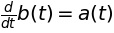

In [96]:
a = Function('a')
b = Function('b')
da_dt = a(t).diff(t)
db_dt = b(t).diff(t)
f1 = Eq(da_dt, a(t)/exp(t**2))
f1 = Eq(db_dt, a(t))
f1


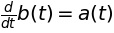

In [97]:
fuckoff2

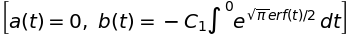

In [98]:
dsolve([fuckoff1, fuckoff2], ics={a(0):0, b(0):0})